In [88]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal
import scipy.stats

In [157]:
def gaussian_avg(x, y, nx, sigma=1):
    
    if x.shape != y.shape:
        raise ValueError(f'Input arrays have different shapes: {x.shape}, {y.shape}')

    # sort input arrays
    argsort = np.argsort(x)
    x = x[argsort]
    y = y[argsort]

    # generate new x axis from x and nx
    xh = np.linspace(x[0], x[-1], nx)

    # for each _xh, compute the corresponding yh
    yh = np.zeros(nx)
    for i, _xh in enumerate(xh):

        # get indices in window
        _ix = np.argwhere(abs(x - _xh) < 2*sigma)

        # get original data in window
        _x = x[_ix]
        _y = y[_ix]

        # get gaussian env for this window
        env = scipy.stats.norm(_xh, sigma).pdf

        # compute weights for original data in this window
        w = env(_x)
        w = w/w.sum()

        # dot with orignal y to get estimated point
        yh[i] = w.T.dot(_y)
    
    return xh, yh


In [90]:
scipy.stats.norm(0, 1).pdf

<bound method rv_frozen.pdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015EAD6556A0>>

In [91]:
N = 1000
n = 950

X = np.random.normal(size=(N, n))
y = np.random.normal(size=(N,))

In [92]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):             -0.134
Method:                 Least Squares   F-statistic:                             0.8759
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                       0.764
Time:                        08:48:29   Log-Likelihood:                         -39.671
No. Observations:                1000   AIC:                                      1979.
Df Residuals:                      50   BIC:                                      6642.
Df Model:                         950                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [93]:
np.linalg.norm(result.resid)**2/N, y.std()**2

(0.06338450433026635, 1.1182358451936454)

In [94]:
N_iter = 4000
max_samp = 100
min_samp = 4

results = list()

for i in range(N_iter):
    
    N = np.random.randint(min_samp, max_samp)
    n = np.random.randint(1, N)

    X = np.random.normal(size=(N, n))
    y = np.random.normal(size=(N,))

    model = sm.OLS(y, X)
    result = model.fit()

    mse = np.linalg.norm(result.resid)**2/N
    r_sqd = mse/(y.std()**2)

    results.append({
        "N" : N,
        "n" : n,
        "n/N" : n/float(N),
        "MSE" : mse,
        "R^2" : r_sqd
    })

In [54]:
df = pd.DataFrame(results)

In [55]:
df.head()

,N,n,n/N,MSE,R^2
0,11,6,0.545455,0.670125,0.705861
1,46,41,0.891304,0.170637,0.143218
2,94,50,0.531915,0.404346,0.417504
3,97,66,0.680412,0.348962,0.344081
4,70,57,0.814286,0.199405,0.163779


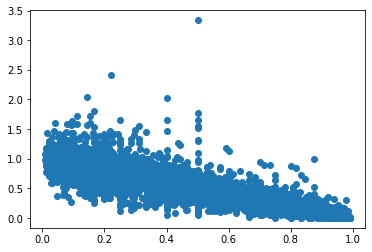

In [113]:
plt.scatter(df['n/N'], df['MSE'])

In [164]:
xh, yh = gaussian_avg(df['n/N'].values, df['MSE'].values, nx=1000, sigma=0.05)

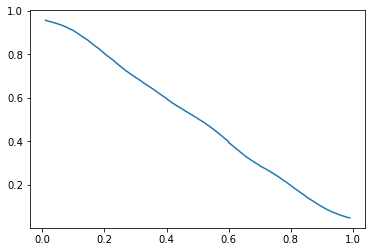

In [165]:
plt.plot(xh, yh)